# 分位点回帰

分位点$\tau$における条件付分位関数を

$$
Q_\tau(y_i | X_i) = F_y^{-1}(\tau | X_i)
$$

と表す。ここで$F_y^{-1}(\tau | X_i)$は$y$において$X_i$に条件づけられた$y_i$の分布関数である（$F_y^{-1}(\tau | X_i) = \inf \{ y: F_y(y|X_i) \geq \tau \}$）。

例えば$\tau = 0.1$のとき、$Q_\tau(y_i | X_i)$は$y_i$の下位10分位である。


標準的な回帰モデルは二乗誤差$(y_i - m(X_i))^2$の和や期待値を最小化するようにモデル$m(X_i)$を学習して条件付き期待値$E(y_i|X_i)$を予測する

$$
\newcommand{\argmin}{\mathop{\rm arg~min}\limits}
E(y_i|X_i) = \argmin_{m(X_i)}
E\big[ (y_i - m(X_i))^2 \big]
$$

**分位点回帰** （quantile regression）モデルはpinball loss$\rho_{\tau}(y_i - q(X_i))$の和や期待値を最小化するようにモデル$q(X_i)$を学習させ、条件付き分位関数$Q_{\tau}(y_i|X_i) = F^{-1}_y(\tau|X_i)$を予測する

$$
Q_{\tau}(y_i|X_i) = \argmin_{q(X_i)} 
E\big[ \rho_{\tau}(y_i - q(X_i)) \big]
$$



pinball lossは $\tau$-tiled absolute value function や 検定関数（check function）とも呼ばれる（グラフを描くとチェックマークに似てるため）

$$
\rho_{\tau} (x) = \big(\tau - \mathbb{1}(x \leq 0) \big) x
$$

あるいは

$$
\rho_{\tau} (x) =
\begin{cases}
(\tau - 1) x & \text{ if } x \leq 0\\
\tau x & \text{ if } x > 0\\
\end{cases}
$$

と書かれる

:::{margin}

$$
\rho_{\tau} (x) = \big(\tau - \mathbb{1}(x \leq 0) \big) x
$$

は

$x \leq 0$のときは

$$
\big(\tau - \mathbb{1}(x \leq 0) \big) x
= (\tau - 1) x
$$

となり、

$x > 0$のときは

$$
\big(\tau - \mathbb{1}(x \leq 0) \big) x
= (\tau - 0) x = \tau x
$$

となるので、

$$
\rho_{\tau} (x) =
\begin{cases}
(\tau - 1) x & \text{ if } x \leq 0\\
\tau x & \text{ if } x > 0\\
\end{cases}
\\
= \big(\tau - \mathbb{1}(x \leq 0) \big) x
$$

:::

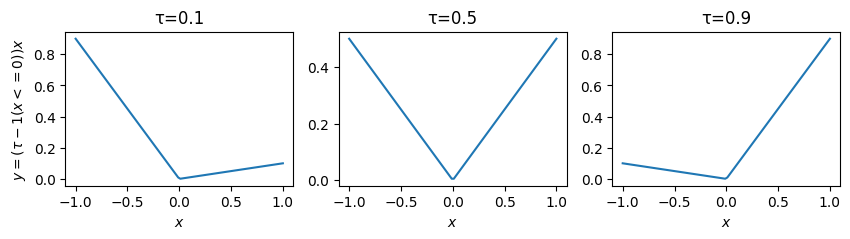

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def pinball_loss(x, tau):
    return (tau - 1 * (x <= 0)) * x

x = np.linspace(-1, 1, 100)
fig, axes = plt.subplots(figsize=[10, 2], ncols=3)
for i, tau in enumerate([0.1, 0.5, 0.9]):
    y = pinball_loss(x, tau=tau)
    axes[i].plot(x, y)
    if i == 0:
        axes[i].set(title=f"τ={tau}", xlabel=r"$x$", ylabel=r"$y = (\tau - 1(x <= 0)) x$")
    else:
        axes[i].set(title=f"τ={tau}", xlabel=r"$x$")
fig.show()

なお、pinball lossは$\tau=0.5$のとき

$$
\begin{align}
\rho_{0.5} (x) 
&=
\begin{cases}
-0.5 x & \text{ if } x \leq 0\\
0.5 x & \text{ if } x > 0\\
\end{cases}
\\
&= \frac{1}{2} |x|
\end{align}
$$

と、絶対誤差と比例する形になる。

絶対誤差の和を目的関数にとった線形モデルは統計学においてleast absolute deviations (LAD) と呼ばれ、その解は条件付き中央値になる

$$
\text{median}(y_i|X_i) = Q_{0.5}(y_i|X_i) = \argmin_{q(X_i)} E\big[ \rho_{0.5}(y_i - q(X_i)) \big]
$$


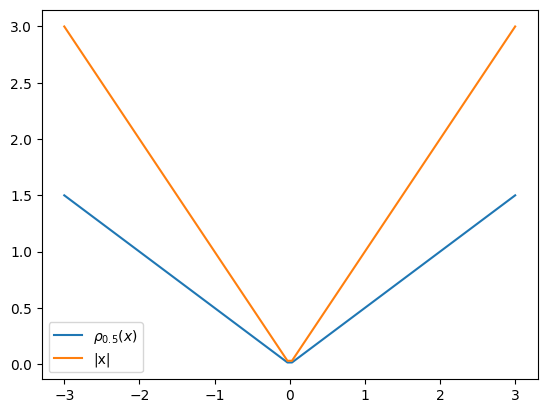

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def pinball_loss(x, tau):
    return (tau - 1 * (x <= 0)) * x

x = np.linspace(-3, 3, 100)
fig, ax = plt.subplots()
ax.plot(x, pinball_loss(x, tau=0.5), label=r"$\rho_{0.5}(x)$")
ax.plot(x, abs(x), label="|x|")
ax.legend()
fig.show()

::::{dropdown} 絶対誤差の最適解

誤差関数$\ell(y, \hat{y})$を絶対誤差$|y - \hat{y}|$とする。予測損失（期待予測誤差）は

$$
\begin{aligned}
R(\hat{y}) &= \mathbb{E}_Y[\ell(y, \hat{y})]\\
&= \int_{-\infty}^{\infty} |y - \hat{y}| f(y) dy\\
\end{aligned}
$$

絶対値の中身の符号で場合分けすると

$$
\begin{aligned}
R(\hat{y}) &= \int_{-\infty}^{\infty} |y - \hat{y}| f(y) dy\\
&= \int_{\hat{y}}^{\infty} (y - \hat{y}) f(y) dy
+ \int_{-\infty}^{\hat{y}} (\hat{y} - y) f(y) dy
\quad (絶対値を符号ごとに場合分けした)\\
&= \int_{\hat{y}}^{\infty} y f(y) dy
- \hat{y} \int_{\hat{y}}^{\infty} f(y) dy
+ \hat{y} \int_{-\infty}^{\hat{y}} f(y) dy
- \int_{-\infty}^{\hat{y}} y f(y) dy
\quad (\because 積分の線形性)
\end{aligned}
$$

予測損失を微分するとそれぞれの項は

$$
\begin{aligned}
\frac{d}{d \hat{y}} \int_{\hat{y}}^{\infty} y f(y) dy &= - \hat{y} f(\hat{y})
\\
\frac{d}{d \hat{y}} \left( - \hat{y} \cdot \int_{\hat{y}}^{\infty} f(y) dy \right)
&= \frac{d}{d \hat{y}} \left( - \hat{y} \right) \int_{\hat{y}}^{\infty} f(y) dy 
+ (- \hat{y}) \frac{d}{d \hat{y}} \left( \int_{\hat{y}}^{\infty} f(y) dy \right)
\quad (積の微分)\\
&= -1 \cdot \int_{\hat{y}}^{\infty} f(y) dy - \hat{y} \cdot - f(\hat{y})\\
&= -\int_{\hat{y}}^{\infty} f(y) dy + \hat{y} f(\hat{y})
\\
\frac{d}{d \hat{y}} \left( \hat{y} \cdot \int_{-\infty}^{\hat{y}} f(y) dy \right)
&= \frac{d}{d \hat{y}} \hat{y} \cdot \int_{-\infty}^{\hat{y}} f(y) dy
+ \hat{y} \cdot \frac{d}{d \hat{y}} \int_{-\infty}^{\hat{y}} f(y) dy \quad (積の微分)\\
&= \int_{-\infty}^{\hat{y}} f(y) dy + \hat{y} \cdot f(\hat{y})
\\
\frac{d}{d \hat{y}} \left( - \int_{-\infty}^{\hat{y}} y f(y) dy \right) &= - \hat{y} f(\hat{y})
\end{aligned}
$$

よって

$$
\begin{aligned}
\frac{d R(\hat{y})}{d \hat{y}}
&= - \hat{y} f(\hat{y})
-\int_{\hat{y}}^{\infty} f(y) dy + \hat{y} f(\hat{y})
+ \int_{-\infty}^{\hat{y}} f(y) dy + \hat{y} f(\hat{y})
- \hat{y} f(\hat{y})\\
&= -\int_{\hat{y}}^{\infty} f(y) dy + \int_{-\infty}^{\hat{y}} f(y) dy
\end{aligned}
$$

となる。$\frac{d R(\hat{y})}{d \hat{y}}=0$とおいて整理すれば

$$
\int_{\hat{y}}^{\infty} f(y) dy = \int_{-\infty}^{\hat{y}} f(y) dy
$$

となる点が予測損失を極小化することがわかる。これは$\hat{y}$が中央値となるときである。

$f(y)$は確率密度関数なので、$\int_{-\infty}^{\infty} f(y) dy=1$になる。$-\infty$から$\hat{y}$への積分と$\hat{y}$から$\infty$への積分が等しくなるのはその半分、すなわち

$$
\int_{-\infty}^{\hat{y}} f(y) dy = \frac{1}{2}
$$

である。なお、これは累積分布関数$\mathrm{P}(\hat{y})$に等しい。よって$\hat{y}$は中央値である。

なお、中央値の定義には、以下の式を満たす$m$

$$
\int_{-\infty}^m \mathrm{~d} F(x) \geq \frac{1}{2} \text { and } \int_m^{\infty} \mathrm{d} F(x) \geq \frac{1}{2}
$$

というものもある。

:::{card} 参考：定積分の微分

定積分の定義

$$
\int_a^x f(t) d t=F(x)-F(a)
$$

より、この導関数は

$$
F'(x)-0 = f(x)
$$
:::

::::

:::{dropdown} Pinball lossの最適解

Pinball Lossを少し表現を変えて

$$
\rho_{\tau} (x) =
\begin{cases}
\tau |x| & \text{ if } x > 0\\
(1 - \tau) |x| & \text{ if } x \leq 0\\
\end{cases}
$$

と表すと、さきほどの絶対誤差の場合分けした項に$\tau, (1 - \tau)$を掛けた形になる

$$
\begin{aligned}
R(\hat{y})
&= \tau \int_{\hat{y}}^{\infty} (y - \hat{y}) f(y) dy
+ (1 - \tau) \int_{-\infty}^{\hat{y}} (\hat{y} - y) f(y) dy \\
\end{aligned}
$$

絶対誤差の場合と同様に導関数は

$$
\begin{aligned}
\frac{d R(\hat{y})}{d \hat{y}}
&= - \tau \int_{\hat{y}}^{\infty} f(y) dy + (1 - \tau)\int_{-\infty}^{\hat{y}} f(y) dy
\end{aligned}
$$

となる。ここで累積分布関数$F(\hat{y})$と補累積分布関数をそれぞれ

$$
F(\hat{y}) := \int_{-\infty}^{\hat{y}} f(y) dy\\
1 - F(\hat{y}) := \int_{\hat{y}}^{\infty} f(y) dy\\
$$

とおき、導関数を0とおく。

$$
\begin{aligned}
\frac{d R(\hat{y})}{d \hat{y}}
&= - \tau (1 - F(\hat{y})) + (1 - \tau) F(\hat{y})
= 0
\end{aligned}
$$

これを整理すると

$$
\begin{aligned}
\tau (1 - F(\hat{y})) &= (1 - \tau) F(\hat{y})\\
\tau - \tau F(\hat{y})) &= (1 - \tau) F(\hat{y})\\
\tau &= \tau F(\hat{y})) + (1 - \tau) F(\hat{y})\\
\tau &= (\tau + (1 - \tau)) F(\hat{y})\\
\tau &= F(\hat{y})\\
\end{aligned}
$$

となり、累積分布$F(\hat{y})$で表される確率（分布のうち$Y$が$-\infty$ から $\hat{y}$までの面積）が$\tau$になることがわかる。
逆関数をとると

$$
\hat{y} = F^{-1}(\tau)\\
$$

となる。累積分布関数の逆関数は分位点なので、$\hat{y}$は確率$\tau$に対応する分位点である。

:::

## モデルの評価

### D2 pinball score

$D^2$は$R^2$の一般化

$$
D^2(y, \hat{y}) = 1 - \frac{\text{dev}(y, \hat{y})}{\text{dev}(y, y_{\text{null}})}
$$

ここで$y_{\text{null}}$は切片のみのモデルの最適解（例：二乗誤差なら$y$の平均値、絶対誤差なら$y$の中央値、pinball lossなら$y$の指定されたquantile）

この$D^2$に

$$
\text{dev}(y, \hat{y}) = \text{pinball}(y, \hat{y})
$$

を代入したものが$D^2$ pinball score


### interval score

- [[2011.09588] Beyond Pinball Loss: Quantile Methods for Calibrated Uncertainty Quantification](https://arxiv.org/abs/2011.09588)

## 分位点回帰モデルの実践

statsmodelsでは `quantreg()` で実行できる

[Quantile regression - statsmodels 0.15.0 (+213)](https://www.statsmodels.org/devel/examples/notebooks/generated/quantile_regression.html)

/tmp/ipykernel_1497/2518785238.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


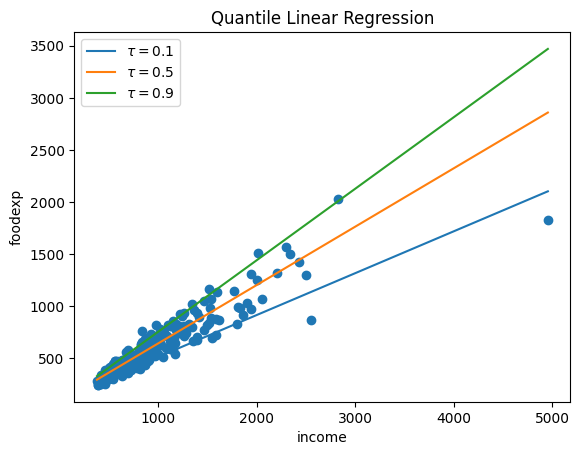

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

data = sm.datasets.engel.load_pandas().data

fig, ax = plt.subplots()
ax.scatter(data["income"], data["foodexp"])
ax.set(xlabel="income", ylabel="foodexp", title="Quantile Linear Regression")

x = np.linspace(data["income"].min(), data["income"].max(), 10)
model = smf.quantreg("foodexp ~ income", data)
for q in [0.1, 0.5, 0.9]:
    res = model.fit(q=q)
    y_hat = res.predict(pd.DataFrame({"income": x}))
    ax.plot(x, y_hat, label=fr"$\tau = {q}$")
ax.legend()
fig.show()